In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from utilities import *

In [2]:
X, y, Xtest, yt = load_data() 

In [3]:
X.shape

(1000, 64, 64)

In [4]:
Xr=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
Xr.shape #1000 images et 4096 observations

(1000, 4096)

In [5]:
y.shape #à chaque image, si un chien ou chat

#   0 _ chat
#   1 _ chien

(1000, 1)

In [37]:
# etape 1 : avoir la matrice de correlation
Cor=np.corrcoef(Xr.T)

In [38]:
Cor.shape

(4096, 4096)

In [39]:
# etape 2 : déterminer ses valeurs propres
vals_propres,P = np.linalg.eig(Cor)

In [40]:
P.shape

(4096, 4096)

In [41]:
# Calculer l'inertie de la composante principale et du plan principal
inertie = sum(vals_propres)
inertie_cp = vals_propres[0]/inertie
inertie_pp = (vals_propres[0]+vals_propres[1])/inertie
print("inertie :",inertie)
print("inertie composante principale :", inertie_cp)
print("inertie plan principal", inertie_pp)

inertie : (4096.000000000012+0j)
inertie composante principale : (0.19626203330055467+0j)
inertie plan principal (0.31277735599856143+0j)


/usr/lib/python3/dist-packages/matplotlib/collections.py:151: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


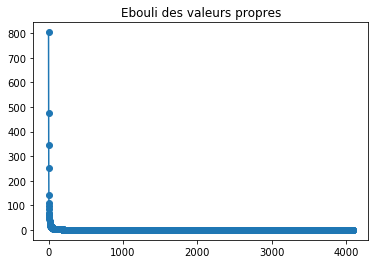

In [43]:
liste = [i for i in range(4096)] 

plt.scatter(liste,vals_propres)
plt.plot(liste,vals_propres)
plt.title("Ebouli des valeurs propres")
plt.show()

#plt.scatter([0,1,2,3,4,5],vals_propres[:6])
#plt.show()

In [10]:
# etape 3 : diagonaliser la matrice de corrélation. Soit P sa matrice de passage
D = np.diag(vals_propres)

In [11]:
# fonction utile

def moy(X):
    e=0
    n=len(X)
    for i in range(n):
        e+=X[i]
    return e/n

def varS(X):
    v=0
    n=len(X)
    m=moy(X)
    for i in range(n):
        v+=(X[i]-m)**2
    return v/n

def ecTypeS(X):
    return np.sqrt(varS(X))


In [29]:
# etape 5 : construire les deux composantes principales
C = np.dot(P,Xr)

Ct = np.transpose(C)

C1 = Ct[0]
C2 = Ct[1]

In [30]:
def liste_chien_chat(y,composante):
    chien = []
    chat = []
    
    for k in range(len(y)):
        if y[k] == [0.]:
            chat.append(composante[k])
        else:
            chien.append(composante[k])
    return (chien,chat)

In [31]:
(chien1,chat1) = liste_chien_chat(y,C1)
(chien2,chat2) = liste_chien_chat(y,C2)

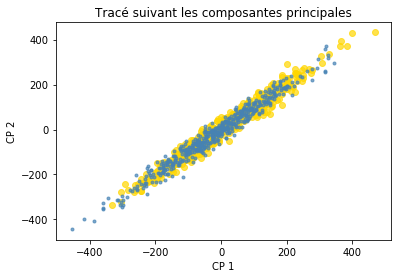

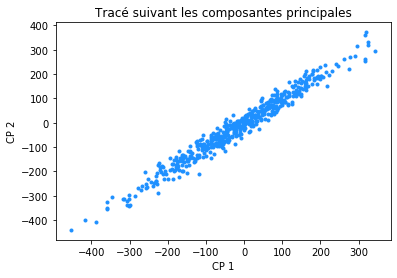

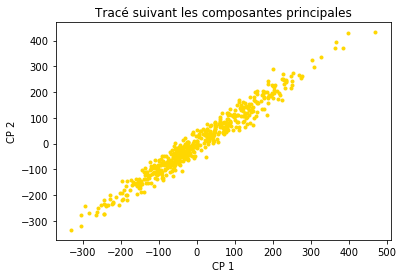

In [32]:
plt.scatter(chien1,chien2,marker='o',color='gold',alpha = 0.7)
plt.scatter(chat1,chat2,marker='.',color='steelblue', alpha = 0.7)
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title("Tracé suivant les composantes principales")
plt.show()

plt.scatter(chat1,chat2,marker='.',color='dodgerblue')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title("Tracé suivant les composantes principales")
plt.show()


plt.scatter(chien1,chien2,marker='.',color='gold')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title("Tracé suivant les composantes principales")

plt.show()

In [33]:
# etape 4 : centré-réduire

# chaque valeur est retire la moyenne de sa ligne et divise par l ecart type de sa ligne
# centre reduit !

X = []
for ligne in Xr :
    L = []
    ecarttype = ecTypeS(ligne)
    moyenne = moy(ligne)
    for valeur in ligne :
        L.append((valeur - moyenne) / ecarttype)
        pass
    X.append(L)
    pass
X = np.transpose(X)


In [27]:
# etape 5 : construire les deux composantes principales - données centrées réduites
Cdr = np.dot(X,P)

Ctdr = np.transpose(Cdr)

C1dr = Ct[0]
C2dr = Ct[1]


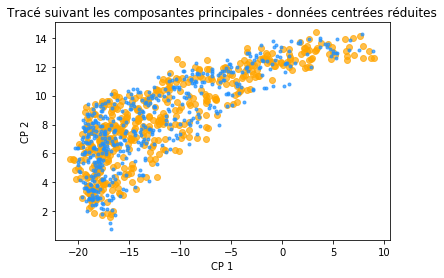

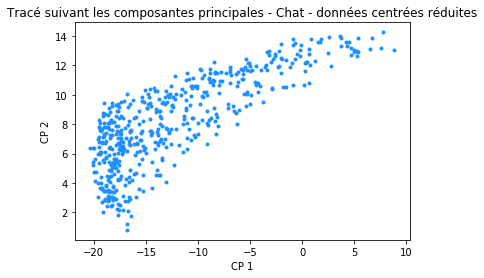

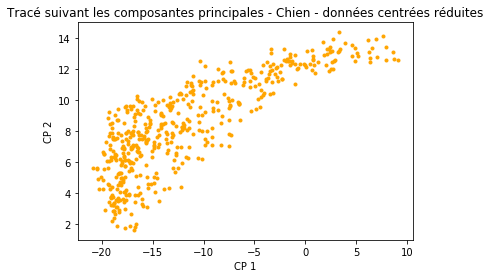

In [28]:
# etape 6 : Tracé les différentes classes suivant les deux composantes principales - données centrées réduites

(chien1dr,chat1dr) = liste_chien_chat(y,C1dr)
(chien2dr,chat2dr) = liste_chien_chat(y,C2dr)

plt.scatter(chien1dr,chien2dr,marker='o',color='orange',alpha=0.7)
plt.scatter(chat1dr,chat2dr,marker='.',color='dodgerblue',alpha=0.7)
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title("Tracé suivant les composantes principales - données centrées réduites")
plt.show()

plt.scatter(chat1dr,chat2dr,marker='.',color='dodgerblue')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title("Tracé suivant les composantes principales - Chat - données centrées réduites")
plt.show()


plt.scatter(chien1dr,chien2dr,marker='.',color='orange')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title("Tracé suivant les composantes principales - Chien - données centrées réduites")
plt.show()